In [54]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist

Carico i dati

In [55]:
(train_x, _), (test_x, _) = fashion_mnist.load_data()
train_x = train_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0
train_x = train_x.reshape(-1, 784)
test_x = test_x.reshape(-1, 784)

Corrompo le immagini

In [56]:
noise_factor = 0.5
noisy_train_x = train_x + noise_factor * np.random.normal(size=train_x.shape)
noisy_test_x = test_x + noise_factor * np.random.normal(size=test_x.shape)
noisy_train_x = np.clip(noisy_train_x, 0.0, 1.0)
noisy_test_x = np.clip(noisy_test_x, 0.0, 1.0)

# Autoencoder

In [57]:
input_layer = Input(shape=(784,))

## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)
output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

#Print summary
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_32 (Dense)            (None, 1500)              1177500   
                                                                 
 dense_33 (Dense)            (None, 1000)              1501000   
                                                                 
 dense_34 (Dense)            (None, 500)               500500    
                                                                 
 dense_35 (Dense)            (None, 10)                5010      
                                                                 
 dense_36 (Dense)            (None, 500)               5500      
                                                                 
 dense_37 (Dense)            (None, 1000)              5010

In [58]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [60]:
model.fit(noisy_train_x, train_x, epochs=20, batch_size=128, shuffle=True, validation_data=(noisy_test_x, test_x),  callbacks=[early_stopping])
# Nel fit -> x = training set corrotto, y = training set originale, validation = test set corrotto, test set reale

Epoch 1/20
469/469 [==============================] - 64s 132ms/step - loss: 0.0416 - val_loss: 0.0266
Epoch 2/20
469/469 [==============================] - 61s 131ms/step - loss: 0.0251 - val_loss: 0.0242
Epoch 3/20
469/469 [==============================] - 62s 133ms/step - loss: 0.0223 - val_loss: 0.0218
Epoch 4/20
469/469 [==============================] - 63s 134ms/step - loss: 0.0208 - val_loss: 0.0211
Epoch 5/20
469/469 [==============================] - 61s 130ms/step - loss: 0.0198 - val_loss: 0.0197
Epoch 6/20
469/469 [==============================] - 62s 133ms/step - loss: 0.0190 - val_loss: 0.0191
Epoch 7/20
469/469 [==============================] - 66s 140ms/step - loss: 0.0183 - val_loss: 0.0188
Epoch 8/20
469/469 [==============================] - 62s 132ms/step - loss: 0.0177 - val_loss: 0.0187
Epoch 9/20
469/469 [==============================] - 62s 133ms/step - loss: 0.0172 - val_loss: 0.0188
Epoch 10/20
469/469 [==============================] - 62s 133ms/step - l

Predizioni

In [62]:
denoised_images = model.predict(noisy_test_x)

313/313 [==============================] - 7s 20ms/step


Plot

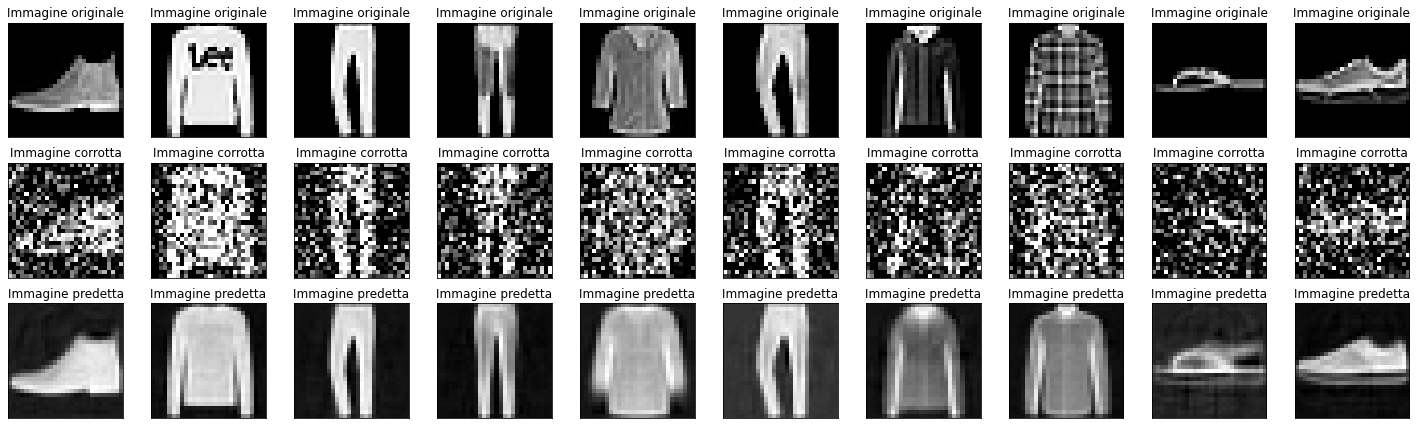

In [68]:
n = 10  # quante immagini mostrare
plt.figure(figsize=(20, 6))

for i in range(n):
    # Immagini reali
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_x[i].reshape(28, 28))
    plt.title("Immagine originale")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Immagini corrotte
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noisy_test_x[i].reshape(28, 28))
    plt.title("Immagine corrotta")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Immagini predette
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i].reshape(28, 28))
    plt.title("Immagine predetta")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()